<a href="https://colab.research.google.com/github/FedericoPerezCannizzaro/Games_DS/blob/main/ProyectoDS_Federico_Perez_Cannizzaro_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# **Steam**
steam es una plataforma de videojuegos usada en todo el mundo. Actualmente es la plataforma de videojuegos de PC en la que la gente mas confianza tiene en utilizar sus datos mas sensibles como por ejemplo:

*   Tarjeta de credito
*   Direccion del Hogar



In [ ]:
df= pd.read_csv('/content/gdrive/MyDrive/data/juegos_steam/games.csv',sep=',')
df.head(1)

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [ ]:
#formateo fechas
df['Release date'] = pd.DatetimeIndex(df['Release date'])
df.head(1)

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,2008-10-21,0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [ ]:
import datetime as dt
df['Year'] = df['Release date'].dt.year
resultado = df.groupby(['Year'])[['Year','Name']].head(4)
total = df['Name'].count()
total

85097


# ***Luego de formatear un poco***

1: A lo largo de los años, desde que esta plataforma se encuentra ¿podriamos considerar que la popularidad de los videojuegos a aumentado a lo largo de los años? para eso tenemos el siguiente grafico

Teniendo en cuenta la cantidad de juegos publicados durante el periodo de su publicacion hasta su actualidad podemos comprobar que el pico de juegos publicados se acerca a 16000 juegos publicados dentro de la plataforma (en este caso en especifico no tomaremos en cuenta el 2024 ya que aun el año no finaliza). Gracias a eso podemos notar que desde la pandemia, la publicacion de videojuegos aumento considerablemente pasando de un valor aproximado de 9000 en 2020 en el comienzo a 12000 a finales de la pandemia

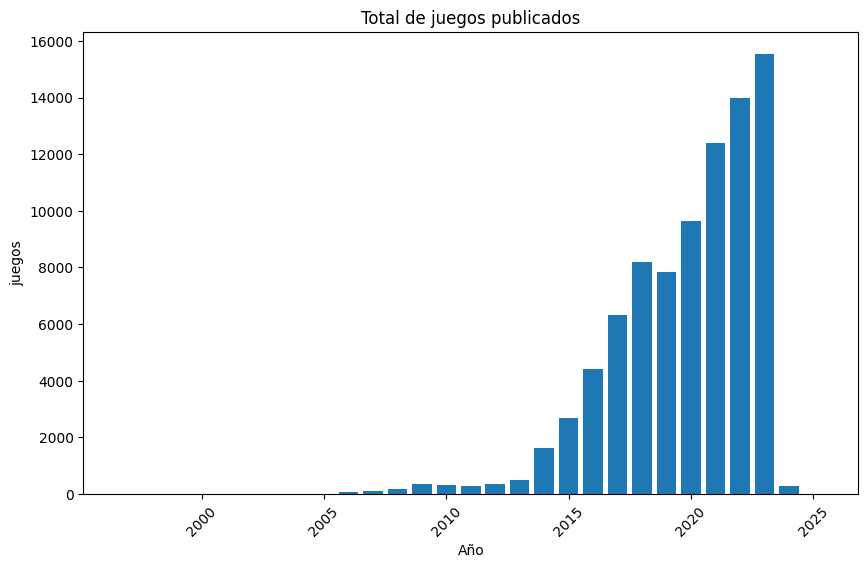

In [ ]:
#agrupo juegos segun su fecha
total_fechas = df.groupby(['Year']).size()
#creo figura
fig, ax = plt.subplots(figsize=(10, 6))
#tomo como index los años + las sumas de sus valores
ax.bar(total_fechas.index, total_fechas.values)
ax.set_title('Total de juegos publicados')
ax.set_ylabel('juegos')
ax.set_xlabel('Año')
# Rotamos las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45)

# Muestra la gráfica
plt.show()

# 2- si analizamos los generos dentro de los videojuego publicados ¿podemos encontrar cual es el genero mas popular?

- Analizando el histplot podemos notar que hay un valor atípico

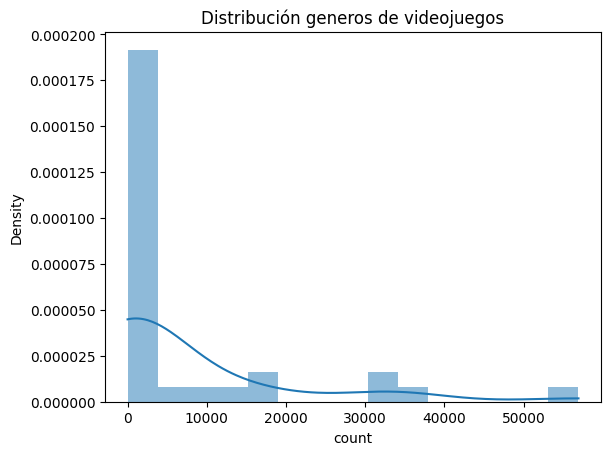

In [ ]:
generos =  df['Genres'].str.split(',', expand=True).stack().value_counts()

fig = plt.figure()
#ax = plt.axes()

ax = sns.histplot(generos, kde=True, stat='density', linewidth=0)

ax.set_title("Distribución generos de videojuegos")
plt.show()

Si traducimos el histpliot podemos notar que este valor atipico hace referencia al genero **"indie"** lo que muestra que actualmente hay un boom de publicaciones de juegos indies

Text(0.5, 0, 'Género')

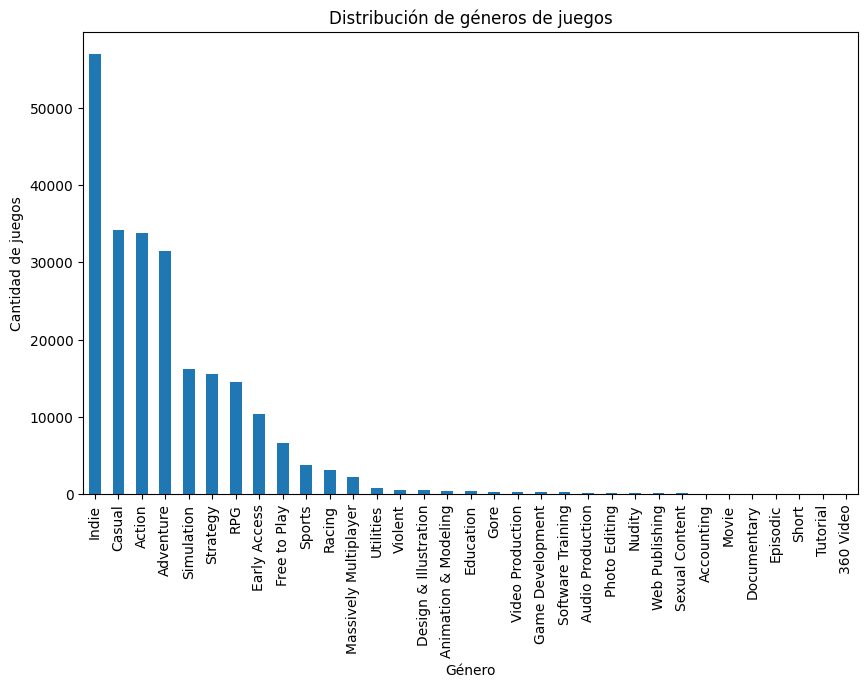

In [ ]:

fig, ax = plt.subplots(figsize=(10, 6))

# Crear el gráfico de barras
generos.plot(kind='bar', ax=ax)

# Configurar el título y etiquetas de los ejes
ax.set_title('Distribución de géneros de juegos')
ax.set_ylabel('Cantidad de juegos')
ax.set_xlabel('Género')

# 3: Actividad en la aplicacion
Analizamos las tendencias respecto a la cantidad de juegos pulicados, generos publicados. podemos decir que la actividad dentro de Steam se ve en aumento.  


In [ ]:
steam_scatterplot = df[['Median playtime forever','Average playtime two weeks','Median playtime two weeks']]
#generos_2020_2023_t = steam_2020_2023_t['Genres'].str.split(',', expand=True).stack().value_counts()
#steam_2020_2023_t['num_genres'] = steam_2020_2023_t['Genres'].str.split(',').apply(len)
sizes = steam_scatterplot ['Median playtime forever'] * 1




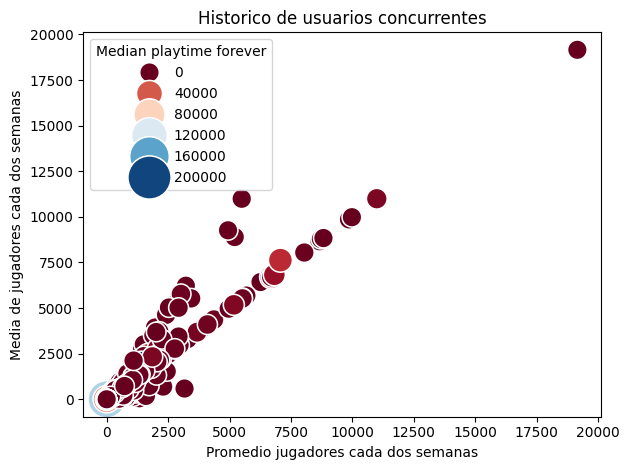

In [ ]:

scatterplot = steam_scatterplot


# customize the scatter plot


sns.scatterplot(x=steam_scatterplot['Average playtime two weeks'], y=steam_scatterplot['Median playtime two weeks'], hue='Median playtime forever', size=sizes, sizes=(200, 1000), data=steam_scatterplot, palette = 'RdBu')


# add labels and title

plt.xlabel("Promedio jugadores cada dos semanas")

plt.ylabel("Media de jugadores cada dos semanas")

plt.title("Historico de usuarios concurrentes")



# display the plot
plt.tight_layout()
plt.show()

# 4. ¿los juegos con estimaciones de propietarios más altas tienden a tener más usuarios concurrentes en promedio?


Si comparamos las columnas


1.   Peak CCU : toma los valores maximos de usuarios reccurentes que tubo un juego
2.   Estimates Owners: cantidad estimada de usuarios por juego

podremos ver que los juegos que mas propietarios tienen fueron los que mas usuarios concurrentes tuvieron. mostrando valores muy altos mientras mas cantidad de jugadores tenga.



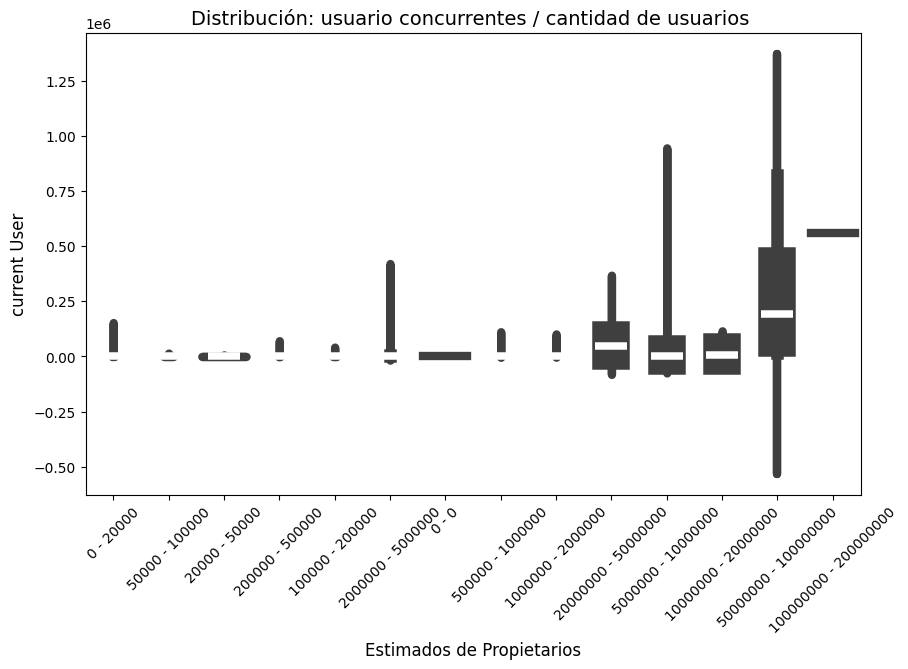

In [ ]:
steam_violin_x = df['Estimated owners'].dropna()
steam_violin_y = df['Peak CCU'].dropna()

# Crear el gráfico de violín
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
sns.violinplot(x=steam_violin_x, y=steam_violin_y, linewidth=6)  # Aumentar el ancho de la línea del violín


# Ajustar los labels del eje x
plt.xlabel('Estimados de Propietarios', fontsize=12)
plt.xticks(rotation=45)  # Rotar los labels del eje x para que sean legibles

# Añadir título y mostrar el gráfico
plt.title('Distribución: usuario concurrentes / cantidad de usuarios ', fontsize=14)
plt.ylabel('current User', fontsize=12)
plt.show()

# 5. analizando las valoraciones de los usuarios
Podemos observar que los usuarios tienden a dar valoraciones positivas en ambas visualizaciones. Sin embargo, en el segundo gráfico, que abarca el período de 2020 a 2024, se aprecia una ausencia de recomendaciones por parte de los usuarios en los últimos años.

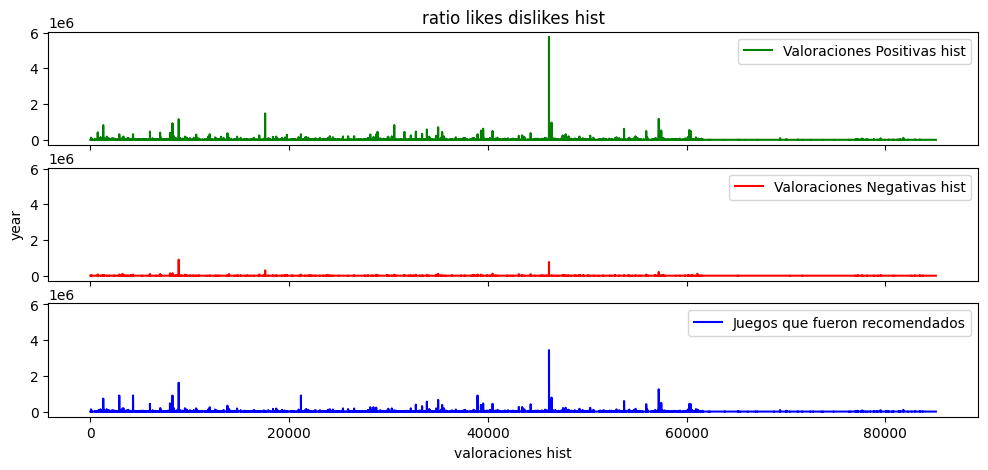

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 5), sharex=True, sharey=True)
ax[0].plot(df['Year'].index, df['Positive'], label='Valoraciones Positivas hist',color = 'green')
ax[1].plot(df['Year'].index, df['Negative'], label='Valoraciones Negativas hist', color='red')
ax[2].plot(df['Year'].index, df['Recommendations'], label='Juegos que fueron recomendados', color='blue')
ax[0].set_title('ratio likes dislikes hist')
ax[2].set_xlabel('valoraciones hist')
ax[1].set_ylabel('year')

ax[0].legend()
ax[1].legend()
ax[2].legend()

In [ ]:
Steam_2020_2023 = df[df['Release date'].dt.year.isin([2020, 2021, 2022, 2023,1014])]
steam_2020_2023_t = Steam_2020_2023[['Peak CCU','Price','Median playtime forever']]
steam_val = Steam_2020_2023[['Positive','Negative','Recommendations','Year']].head()


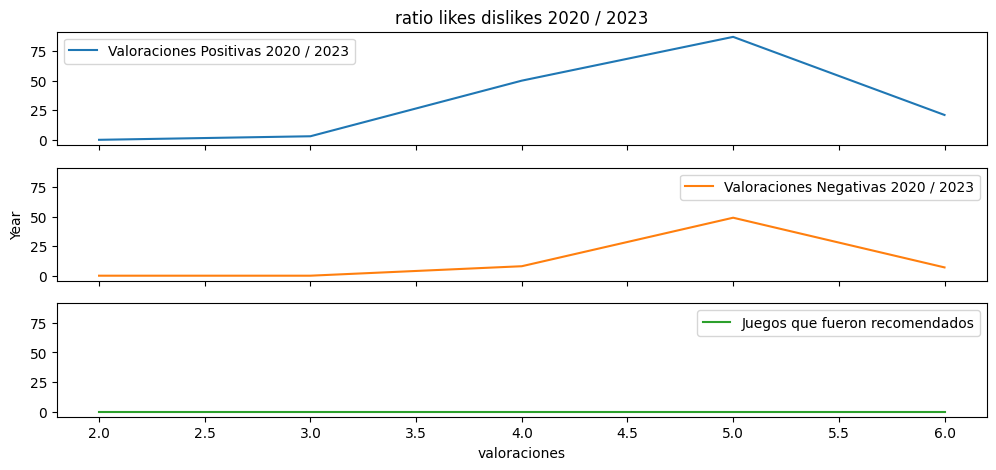

In [ ]:
sizes = steam_2020_2023_t['Median playtime forever'] * 20
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 5), sharex=True, sharey=True)
ax[0].plot(steam_val['Year'].index, steam_val['Positive'], label='Valoraciones Positivas 2020 / 2023')
ax[1].plot(steam_val['Year'].index, steam_val['Negative'], label='Valoraciones Negativas 2020 / 2023', color='C1')
ax[2].plot(steam_val['Year'].index, steam_val['Recommendations'], label='Juegos que fueron recomendados', color='C2')
ax[0].set_title('ratio likes dislikes 2020 / 2024')
ax[2].set_xlabel('valoraciones')
ax[1].set_ylabel('Year')

ax[0].legend()
ax[1].legend()
ax[2].legend()

# 6.Distribucion de sistemas operativos
-En caso de querer priorizar actualizaciones o ciertos descuentos se deberia priorizar los usuarios que posean windows


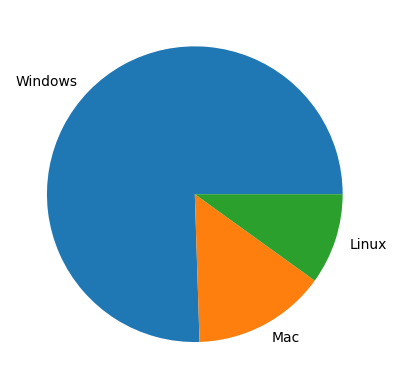

In [ ]:
os_w = df['Windows'].astype(int).sum()
os_m = df['Mac'].astype(int).sum()
os_l = df['Linux'].astype(int).sum()
cantidad_juegos = len(df)

valores = [os_w,os_m,os_l]
etiquetas = ['Windows','Mac','Linux']
fig, ax = plt.subplots()
plt.pie(valores, labels=etiquetas)
plt.show()